# Team 105 Project - AQI Data Exploration

In [1]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
#Because we previously explored a single data frame in an earlier notebook, we know that all files are delimited. 
#For this reason, we will import all AQI data to create our AQI DF
AQI_2006_df = pd.read_csv("data/annual_aqi_by_county_2006.csv", delimiter = ',')
AQI_2007_df = pd.read_csv("data/annual_aqi_by_county_2007.csv", delimiter = ',')
AQI_2008_df = pd.read_csv("data/annual_aqi_by_county_2008.csv", delimiter = ',')
AQI_2009_df = pd.read_csv("data/annual_aqi_by_county_2009.csv", delimiter = ',')
AQI_2010_df = pd.read_csv("data/annual_aqi_by_county_2010.csv", delimiter = ',')
AQI_2011_df = pd.read_csv("data/annual_aqi_by_county_2011.csv", delimiter = ',')
AQI_2012_df = pd.read_csv("data/annual_aqi_by_county_2012.csv", delimiter = ',')
AQI_2013_df = pd.read_csv("data/annual_aqi_by_county_2013.csv", delimiter = ',')
AQI_2014_df = pd.read_csv("data/annual_aqi_by_county_2014.csv", delimiter = ',')
AQI_2015_df = pd.read_csv("data/annual_aqi_by_county_2015.csv", delimiter = ',')
AQI_2016_df = pd.read_csv("data/annual_aqi_by_county_2016.csv", delimiter = ',')

In [8]:
AQI_2006_df.columns

Index(['State', 'County', 'Year', 'Days with AQI', 'Good Days',
       'Moderate Days', 'Unhealthy for Sensitive Groups Days',
       'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days SO2', 'Days PM2.5', 'Days PM10'],
      dtype='object')

In [9]:
AQI_2006_df.head(10)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,Alabama,Baldwin,2006,280,174,81,24,1,0,0,156,97,46,0,0,219,0,61,0
1,Alabama,Barbour,2006,11,6,5,0,0,0,0,77,63,35,0,0,0,0,11,0
2,Alabama,Clay,2006,286,165,112,9,0,0,0,140,80,48,0,0,201,0,85,0
3,Alabama,Colbert,2006,365,254,102,9,0,0,0,129,71,42,0,0,178,101,86,0
4,Alabama,DeKalb,2006,363,215,133,15,0,0,0,140,84,47,0,0,303,0,60,0
5,Alabama,Elmore,2006,244,166,72,6,0,0,0,112,77,46,0,0,244,0,0,0
6,Alabama,Escambia,2006,121,55,66,0,0,0,0,94,71,52,0,0,0,0,121,0
7,Alabama,Etowah,2006,282,168,108,6,0,0,0,129,74,48,0,0,196,0,85,1
8,Alabama,Houston,2006,285,177,102,6,0,0,0,126,77,46,0,0,194,0,91,0
9,Alabama,Jackson,2006,365,339,23,3,0,0,0,104,39,7,0,0,0,365,0,0


In [10]:
AQI_2006_df.tail(10)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
1110,Wyoming,Laramie,2006,119,115,4,0,0,0,0,57,29,17,0,0,0,0,89,30
1111,Wyoming,Lincoln,2006,360,354,5,0,0,1,0,299,31,15,0,0,0,0,0,360
1112,Wyoming,Natrona,2006,88,85,3,0,0,0,0,66,31,17,0,0,0,0,0,88
1113,Wyoming,Park,2006,115,114,1,0,0,0,0,51,21,8,0,0,0,0,87,28
1114,Wyoming,Platte,2006,61,57,4,0,0,0,0,91,40,19,0,0,0,0,0,61
1115,Wyoming,Sheridan,2006,237,184,53,0,0,0,0,93,60,31,0,0,0,0,86,151
1116,Wyoming,Sublette,2006,365,158,195,11,1,0,0,166,90,54,0,51,302,0,10,2
1117,Wyoming,Sweetwater,2006,365,261,99,4,0,0,1,344,71,42,0,14,233,0,0,118
1118,Wyoming,Teton,2006,363,254,108,1,0,0,0,140,71,44,15,0,327,0,17,4
1119,Wyoming,Weston,2006,181,181,0,0,0,0,0,37,20,4,0,0,0,181,0,0


KD: The next step is to concat the data frames. Initally I thought this would be best completed by using:
<i>vertical_stack = pd.concat([df1,df2], axis = 0)</i>
but that seemed very manual. I've decided to test the following instead 
<i>pdList = [df1, df2, ...]</i>
<i>new_df = pd.concat(pdList)</i>

In [12]:
#Adding items to a list and then concatenating the list.
pdList = [AQI_2006_df, AQI_2007_df, AQI_2008_df, AQI_2009_df, AQI_2010_df,
         AQI_2011_df, AQI_2012_df, AQI_2013_df, AQI_2014_df, AQI_2015_df, AQI_2016_df]
AQI_df = pd.concat(pdList)

In [14]:
#And now I want to check to make sure all the years are in there...
AQI_df['Year'].value_counts()

2006    1120
2007    1108
2008    1100
2009    1099
2010    1098
2011    1093
2012    1071
2013    1062
2015    1061
2014    1054
2016    1054
Name: Year, dtype: int64

KD: Looking at the data, I can tell that we may have some counties where data is missing over time. We're only looking at California for this project, so I'll get a better sense of that once I'm going to move forward with removing all other counties. But first, let me copy this df!

In [15]:
#Making the copy
AQI_df_copy = AQI_df.copy()

KD: Cool. Now to remove everything that isn't in Cali. To me, the easiest way to do this would be to remove by state value so that only CA remains. I'm sure there's a way to have done this before combining all the files, but I don't know it. Stackoverflow suggests using boolean indexing or query for this. When I tried that, I only got 2006 Data for CA which seems quite incorrect. So I've returned to the combined df copy to check for CA in the records. CA has 58 counties so we should be looking for somewhere around 580 results.

In [34]:
#I don't know how to return JUST CA and I have a lot of work to complete this evening.
#So I'm doing it the long way - sorry.
AQI_df_copy['State'].value_counts()

California              589
North Carolina          508
Texas                   477
Indiana                 473
Ohio                    472
Pennsylvania            417
Florida                 417
Virginia                407
Georgia                 364
New York                354
Colorado                337
Wisconsin               337
Kentucky                335
Washington              326
Michigan                315
Illinois                292
Tennessee               280
Oregon                  255
Oklahoma                249
Louisiana               248
Missouri                235
Minnesota               229
South Carolina          227
Iowa                    215
Alabama                 210
Montana                 207
Wyoming                 199
Idaho                   196
New Mexico              193
New Jersey              180
Maryland                172
West Virginia           170
Arkansas                156
Kansas                  150
Utah                    150
Arizona             

In [35]:
#Now I want to remove all the other states EXCEPT California. 
CA_AQI_df = AQI_df_copy[AQI_df_copy['State'] == 'California']
CA_AQI_df = AQI_df_copy.query("State == 'California'")

In [38]:
#Checking to make sure CA values remain untouched.
CA_AQI_df['State'].value_counts()

California    589
Name: State, dtype: int64

In [39]:
#Printing head
CA_AQI_df.head(10)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
62,California,Alameda,2006,365,220,123,17,5,0,0,190,84,45,0,25,155,0,185,0
63,California,Amador,2006,364,265,69,27,3,0,0,185,97,37,0,0,364,0,0,0
64,California,Butte,2006,365,155,142,59,9,0,0,172,122,56,0,1,262,0,100,2
65,California,Calaveras,2006,364,230,88,34,11,1,0,201,108,42,0,0,347,0,17,0
66,California,Colusa,2006,365,234,128,2,1,0,0,154,74,45,0,0,216,0,145,4
67,California,Contra Costa,2006,365,265,80,16,4,0,0,169,83,41,0,42,236,9,76,2
68,California,Del Norte,2006,124,120,4,0,0,0,0,77,32,12,0,0,0,0,94,30
69,California,El Dorado,2006,365,215,71,50,27,2,0,210,143,43,0,0,365,0,0,0
70,California,Fresno,2006,365,82,149,85,47,2,0,208,156,80,0,21,194,0,149,1
71,California,Glenn,2006,364,268,88,7,1,0,0,153,67,41,0,0,284,0,76,4


In [40]:
#Printing tail
CA_AQI_df.tail(10)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
93,California,Solano,2016,366,278,86,2,0,0,0,105,62,40,0,3,208,0,155,0
94,California,Sonoma,2016,366,348,18,0,0,0,0,87,44,32,0,0,298,0,64,4
95,California,Stanislaus,2016,366,147,176,40,3,0,0,164,103,55,0,1,202,0,159,4
96,California,Sutter,2016,366,166,168,32,0,0,0,147,97,53,0,0,204,0,162,0
97,California,Tehama,2016,366,226,98,37,5,0,0,174,108,44,0,0,325,0,40,1
98,California,Trinity,2016,167,116,51,0,0,0,0,96,70,38,0,0,0,0,167,0
99,California,Tulare,2016,366,80,162,102,22,0,0,177,145,77,0,0,222,0,137,7
100,California,Tuolumne,2016,354,223,86,38,7,0,0,164,108,44,0,0,354,0,0,0
101,California,Ventura,2016,366,173,184,9,0,0,0,147,84,51,0,0,232,0,127,7
102,California,Yolo,2016,366,293,69,4,0,0,0,115,61,40,0,1,281,0,83,1


KD: Just looking at the data, we're going to need to reflect the Good/Moderate/Unhealthy/etc. days as a % of the total Days with AQI since some counties did not collect data every day of the year. Laura has suggested creating a value system, similar to star ratings online, that would be a singular summary of a data point as opposed to this approach.

In [44]:
pd.options.mode.chained_assignment = None  # default='warn'
#Adding new columns for % and using the rounding function to limit to 2 decimal places

CA_AQI_df['% Good Days'] = round((CA_AQI_df['Good Days']/CA_AQI_df['Days with AQI'])*100,2)
CA_AQI_df['% Moderate Days'] = round((CA_AQI_df['Moderate Days']/CA_AQI_df['Days with AQI'])*100,2)
CA_AQI_df['% Unhealthy for Sensitive Groups Days'] = round((CA_AQI_df['Unhealthy for Sensitive Groups Days']/CA_AQI_df['Days with AQI'])*100,2)
CA_AQI_df['% Unhealthy Days'] = round((CA_AQI_df['Unhealthy Days']/CA_AQI_df['Days with AQI'])*100,2)
CA_AQI_df['% Very Unhealthy Days'] = round((CA_AQI_df['Very Unhealthy Days']/CA_AQI_df['Days with AQI'])*100,2)
CA_AQI_df['% Hazardous Days'] = round((CA_AQI_df['Hazardous Days']/CA_AQI_df['Days with AQI'])*100,2)
CA_AQI_df['% PM2.5 Days'] = round ((CA_AQI_df['Days PM2.5']/CA_AQI_df['Days with AQI'])*100,2)

#Just going to check the tail on this
CA_AQI_df.tail(10)


,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,Days SO2,Days PM2.5,Days PM10,% Good Days,% Moderate Days,% Unhealthy for Sensitive Groups Days,% Unhealthy Days,% Very Unhealthy Days,% Hazardous Days,% PM2.5 Days
93,California,Solano,2016,366,278,86,2,0,0,0,...,0,155,0,75.96,23.50,0.55,0.00,0.0,0.0,42.35
94,California,Sonoma,2016,366,348,18,0,0,0,0,...,0,64,4,95.08,4.92,0.00,0.00,0.0,0.0,17.49
95,California,Stanislaus,2016,366,147,176,40,3,0,0,...,0,159,4,40.16,48.09,10.93,0.82,0.0,0.0,43.44
96,California,Sutter,2016,366,166,168,32,0,0,0,...,0,162,0,45.36,45.90,8.74,0.00,0.0,0.0,44.26
97,California,Tehama,2016,366,226,98,37,5,0,0,...,0,40,1,61.75,26.78,10.11,1.37,0.0,0.0,10.93
98,California,Trinity,2016,167,116,51,0,0,0,0,...,0,167,0,69.46,30.54,0.00,0.00,0.0,0.0,100.00
99,California,Tulare,2016,366,80,162,102,22,0,0,...,0,137,7,21.86,44.26,27.87,6.01,0.0,0.0,37.43
100,California,Tuolumne,2016,354,223,86,38,7,0,0,...,0,0,0,62.99,24.29,10.73,1.98,0.0,0.0,0.00
101,California,Ventura,2016,366,173,184,9,0,0,0,...,0,127,7,47.27,50.27,2.46,0.00,0.0,0.0,34.70
102,California,Yolo,2016,366,293,69,4,0,0,0,...,0,83,1,80.05,18.85,1.09,0.00,0.0,0.0,22.68


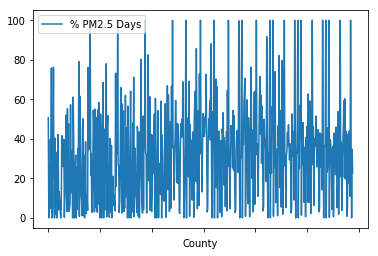

In [51]:
#What follows are some very bad visualization choices for this data
#This just to give us an idea of how much percent of the time this data is reflected in AQI
#We checked this in an earlier notebook and found that the results were accurate 

#Plotting PM2.5 - considered main pollutant 
CA_AQI_df.plot(x= "County", y = "% PM2.5 Days")


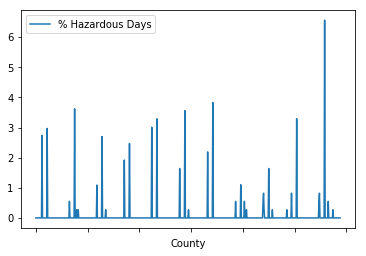

In [52]:
#Just doing some simple plots to look at overall rates
CA_AQI_df.plot(x = "County", y = "% Hazardous Days")

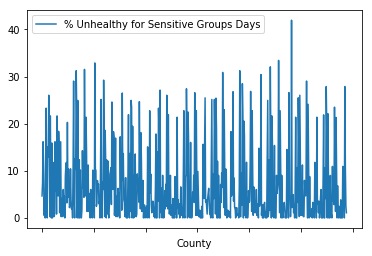

In [53]:
CA_AQI_df.plot(x = "County", y = "% Unhealthy for Sensitive Groups Days")

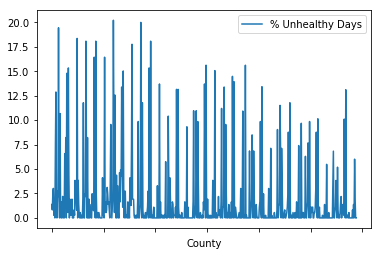

In [54]:
CA_AQI_df.plot(x = "County", y = "% Unhealthy Days")

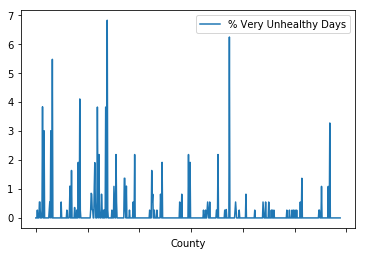

In [55]:
CA_AQI_df.plot(x = "County", y = "% Very Unhealthy Days")